# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


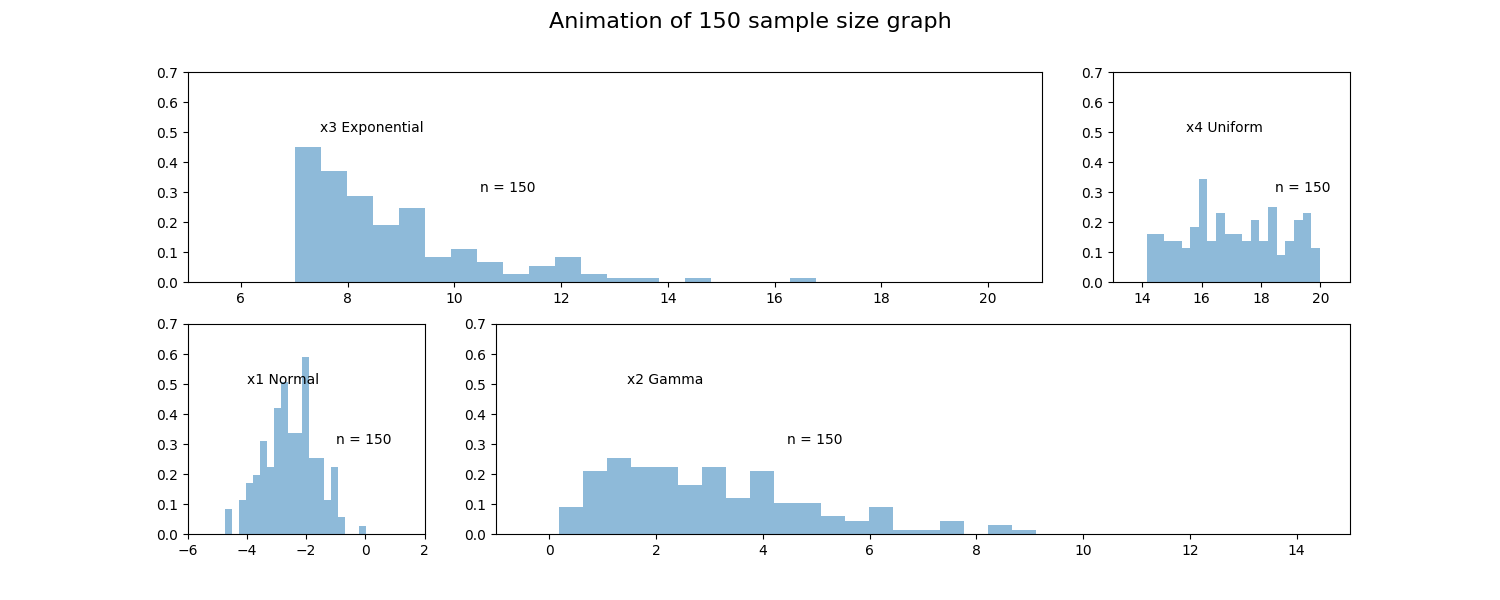

<IPython.core.display.Javascript object>


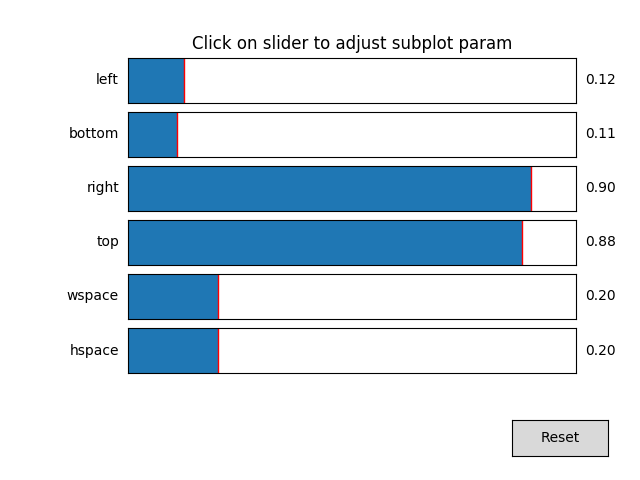

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib.widgets import SubplotTool as subtool

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# make 4 spaces using gridspec
fig = plt.figure(figsize=(15,6))
gspec = gridspec.GridSpec(4,4, wspace=0.3, hspace=0.5)

top_left = plt.subplot(gspec[:2,:3])
top_right = plt.subplot(gspec[:2, 3:])
below_left = plt.subplot(gspec[2:,:1])
below_right = plt.subplot(gspec[2:,1:])

# draw histogram, set titles and set xlim for each plots.
# top_left.hist(x3, normed=True, bins=20, alpha=0.5)
# top_left.text(x3.mean()-1.5, 0.5, 'x3 Exponential')
# top_left.set_xlim(5, 21)


# top_right.hist(x4, normed=True, bins=20, alpha=0.5)
# top_right.text(x4.mean()-1.5, 0.5, 'x4 Uniform')
# top_right.set_xlim(13, 21)

# below_left.hist(x1, normed=True, bins=20, alpha=0.5)
# below_left.text(x1.mean()-1.5, 0.5, 'x1 Normal')
# below_left.set_xlim(-6, 2)

# below_right.hist(x2, normed=True, bins=20, alpha=0.5)
# below_right.text(x2.mean()-1.5, 0.5, 'x2 Gamma')
# below_right.set_xlim(-1, 15)

# set a same ylim for all plots.
# for ax in [below_left, top_left, top_right, below_right]:
#     ax.set_ylim(0, 0.7)
    
# z = zip([x1, x2, x3, x4], [below_left, below_right, top_left, top_right])

target = np.random.randint(100,1000)



# function for animation
def update(curr):
    curr = curr * 50
    # check if animation is at the last frame, and if so, stop the animation a
    
    if curr > target: 
        a.event_source.stop()
    
    fig.suptitle('Animation of {} sample size graph'.format(target + (50-target%50)), fontsize=16)
    
    top_left.cla()
    top_right.cla()
    below_left.cla()
    below_right.cla()
#     print("clear axes")
    
    top_left.hist(x3[:curr], normed=True, bins=20, alpha=0.5)
    top_right.hist(x4[:curr], normed=True, bins=20, alpha=0.5)
    below_left.hist(x1[:curr], normed=True, bins=20, alpha=0.5)
    below_right.hist(x2[:curr], normed=True, bins=20, alpha=0.5)
#     print("draw histogram")
    
    top_left.text(x3.mean()-1.5, 0.5, 'x3 Exponential')
    top_right.text(x4.mean()-1.5, 0.5, 'x4 Uniform')
    below_left.text(x1.mean()-1.5, 0.5, 'x1 Normal')
    below_right.text(x2.mean()-1.5, 0.5, 'x2 Gamma')
#     print("draw text")
    
    top_left.set_xlim(5, 21)
    top_right.set_xlim(13, 21)
    below_left.set_xlim(-6, 2)
    below_right.set_xlim(-1, 15)
#     print("set xlim")
    
    for ax in [below_left, top_left, top_right, below_right]:
        ax.set_ylim(0, 0.7)
    
    top_left.annotate('n = {}'.format(curr), [x3.mean()+1.5, 0.3])
    top_right.annotate('n = {}'.format(curr), [x4.mean()+1.5, 0.3])
    below_left.annotate('n = {}'.format(curr), [x1.mean()+1.5, 0.3])
    below_right.annotate('n = {}'.format(curr), [x2.mean()+1.5, 0.3])
#     print("annotate points")

    
# make animation
a = animation.FuncAnimation(fig, update, interval=target)
new_fig = plt.figure()
subtool(fig, new_fig)
    